In [2]:
import os
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [3]:
# Training solutions dataframe
training_solutions = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")
training_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [4]:
# Categorical data dataframe
train_cat = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [5]:
# Quantitative data dataframe
train_quant = pd.read_excel("../../data/raw/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
train_quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [6]:
# Combine categorical training data with labels
combined_df = pd.merge(train_cat, training_solutions, on='participant_id')
combined_df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [7]:
# Combine quantitative training data with labels
combined_df_q = pd.merge(train_quant, training_solutions, on='participant_id')
combined_df_q.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,4,11,4,10,7,3,9,8.940679,1,1


In [8]:
category_mappings = {
    'PreInt_Demos_Fam_Child_Ethnicity': {0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino', 2: 'Decline to specify', 3: 'Unknown'},
    'PreInt_Demos_Fam_Child_Race': {0: 'White/Caucasian', 1: 'Black/African American', 2: 'Hispanic', 3: 'Asian', 4: 'Indian',
                                     5: 'Native American Indian', 6: 'American Indian/Alaskan Native',
                                     7: 'Native Hawaiian/Other Pacific Islander', 8: 'Two or more races',
                                     9: 'Other race', 10: 'Unknown', 11: 'Choose not to specify'},
    'MRI_Track_Scan_Location': {1: 'Staten Island', 2: 'RUBIC', 3: 'CBIC', 4: 'CUNY'},
    'Basic_Demos_Study_Site': {1: 'Staten Island', 2: 'MRV', 3: 'Midtown', 4: 'Harlem', 5: 'SI RUMC'},
    'Barratt_Barratt_P1_Edu': {3: 'Less than 7th grade', 6: 'Junior high (9th grade)', 9: 'Partial high school', 12: 'High school graduate',
                               15: 'Partial college', 18: 'College education', 21: 'Graduate degree'},
    'Barratt_Barratt_P2_Edu': {3: 'Less than 7th grade', 6: 'Junior high (9th grade)', 9: 'Partial high school', 12: 'High school graduate',
                               15: 'Partial college', 18: 'College education', 21: 'Graduate degree'},
    'Barratt_Barratt_P1_Occ': {0: 'Homemaker', 5: 'Day laborer', 10: 'Garbage collector', 15: 'Painter', 20: 'Mechanic',
                               25: 'Machinist', 30: 'Supervisor', 35: 'Nurse', 40: 'Engineer', 45: 'Physician'},
    'Barratt_Barratt_P2_Occ': {0: 'Homemaker', 5: 'Day laborer', 10: 'Garbage collector', 15: 'Painter', 20: 'Mechanic',
                               25: 'Machinist', 30: 'Supervisor', 35: 'Nurse', 40: 'Engineer', 45: 'Physician'}
}

In [9]:
# Apply label mappings
data = combined_df.copy()
data['ADHD_Outcome'] = data['ADHD_Outcome'].map({0: 'Other/None', 1: 'ADHD'})
data['Sex_F'] = data['Sex_F'].map({0: 'Male', 1: 'Female'})

In [10]:
data.head(5)

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,ADHD,Female
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,ADHD,Male
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,ADHD,Male
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,ADHD,Female
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,ADHD,Female


## Scatterplots for Numerical Features. 
- Each scatterplot is one numerical variable mapped against another numerical variable, to visualize the associations and relationships between each other. 
- Color and shape are used for ADHD_Outcome and Sex_F. 
- Any blue dot means No ADHD (0), and any red dot means ADHD (1). 
- Any triangle means male (0), and any circle means female (1). 
    - A red circle means a female with ADHD, a red triangle means a female without ADHD, a blue triangle means a male without ADHD, and a blue circle means a male with ADHD. 

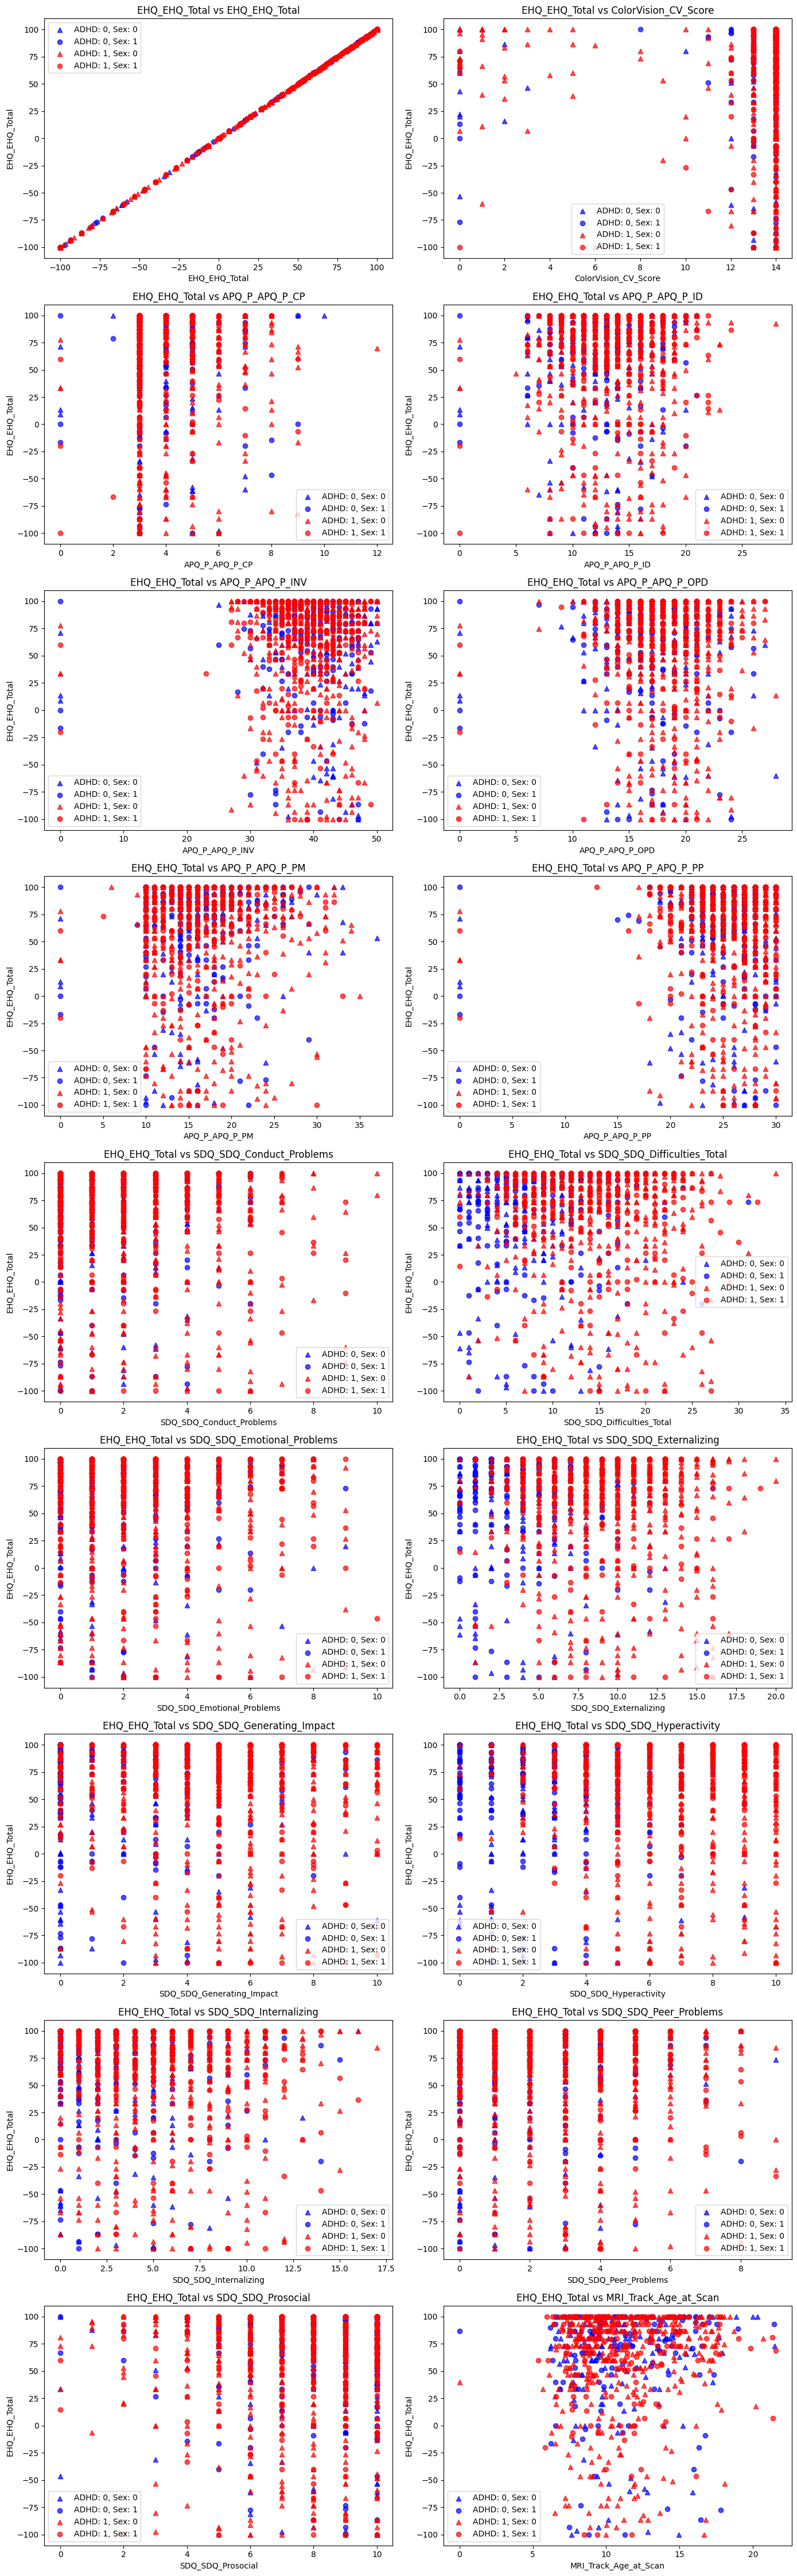

In [11]:
# Define color and marker mappings
palette = {0: "blue", 1: "red"}  # ADHD_Outcome: 0 (No ADHD) -> Blue, 1 (ADHD) -> Red
markers = {0: "^", 1: "o"}  # Sex_F: 0 (Male) -> triangle, 1 (Female) -> Circle

# Select numerical features (excluding participant_id, ADHD_Outcome, Sex_F)
numerical_features = combined_df_q.select_dtypes(include=["number"]).columns
numerical_features = [col for col in numerical_features if col not in ["participant_id", "ADHD_Outcome", "Sex_F"]]

# Create subplots
num_plots = len(numerical_features)
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2), ncols=2, figsize=(14, 5 * ((num_plots // 2) + (num_plots % 2))))
axes = axes.flatten()

# Loop through numerical features and create scatterplots
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    for (adhd, sex), subset in combined_df_q.groupby(["ADHD_Outcome", "Sex_F"]):
        ax.scatter(subset[feature], subset["EHQ_EHQ_Total"], 
                   c=palette[adhd], marker=markers[sex], 
                   label=f"ADHD: {adhd}, Sex: {sex}", alpha=0.7)
    
    ax.set_xlabel(feature)
    ax.set_ylabel("EHQ_EHQ_Total")
    ax.set_title(f"EHQ_EHQ_Total vs {feature}")
    ax.legend()

plt.tight_layout()
plt.show()

In [12]:
data.head(5)

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,ADHD,Female
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,ADHD,Male
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,ADHD,Male
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,ADHD,Female
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,ADHD,Female


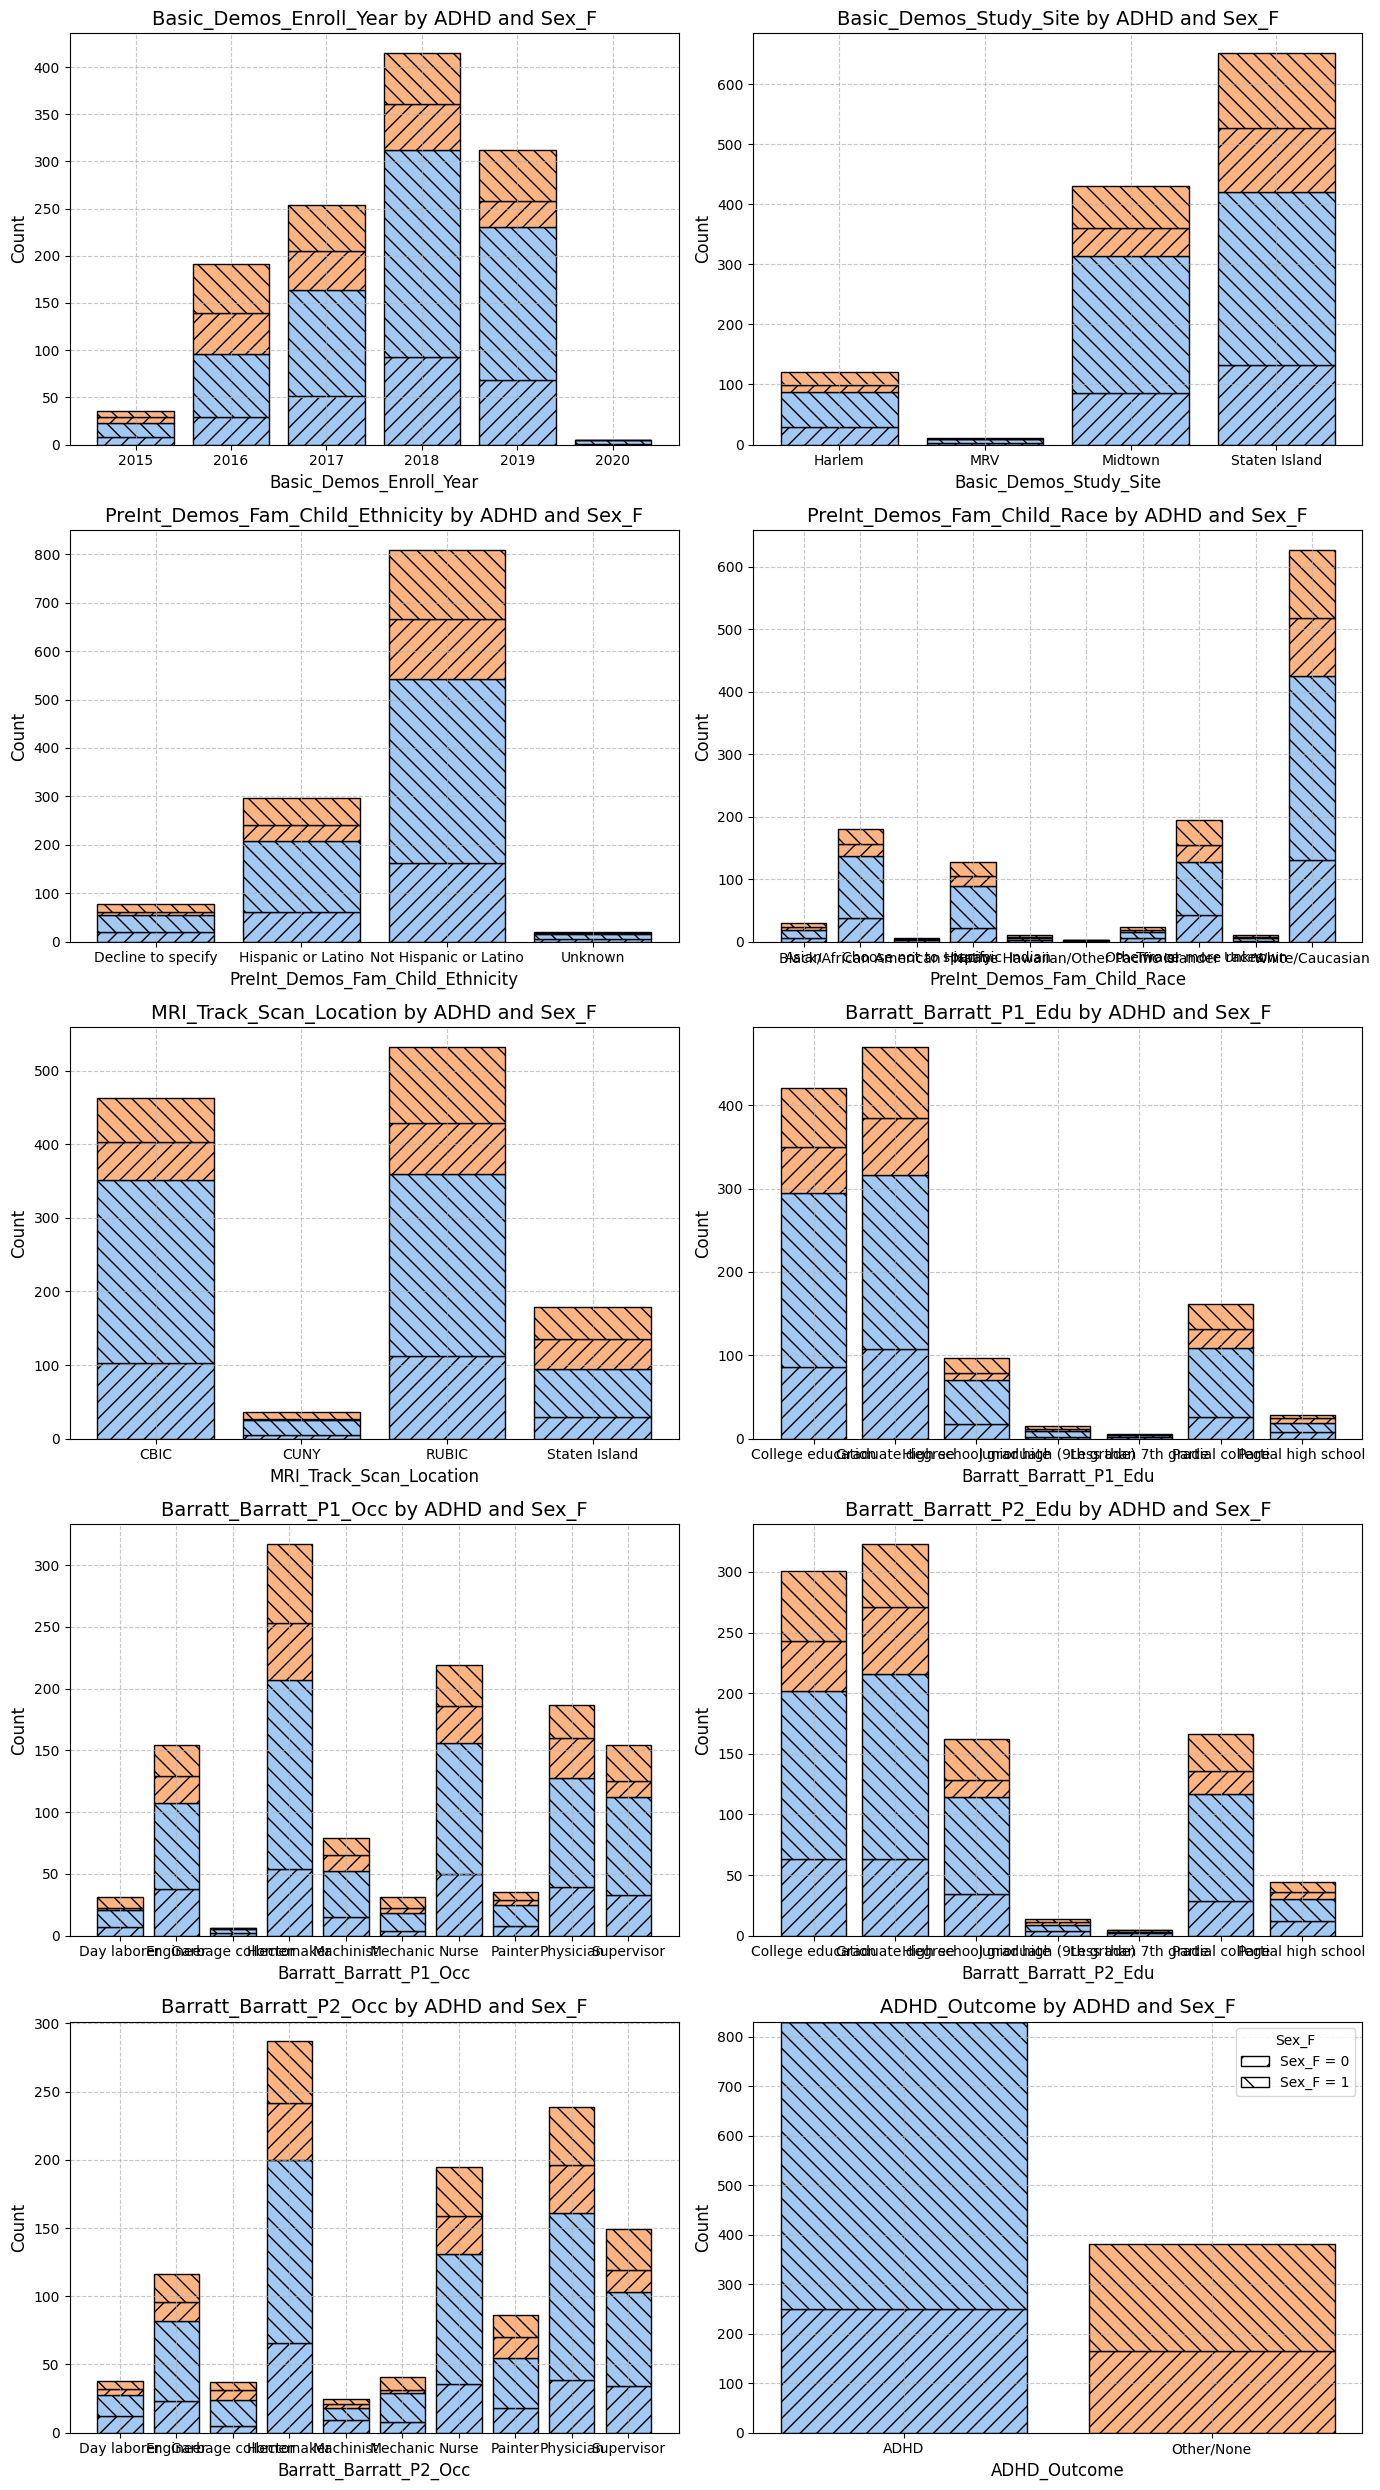

In [13]:
# mapping categorical columns
for col, mapping in category_mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)
        
# Define colors
colors = sns.color_palette("pastel", n_colors=len(data['ADHD_Outcome'].unique()))

# Define hatching patterns
hatch_patterns = ['/', '\\']

# Number of subplots
num_columns = len(data.columns[1:-1])
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, 
                         figsize=(14, 5 * ((num_columns // 2) + (num_columns % 2))))
axes = axes.flatten()

# Stacked bar charts with hatching
for i, column in enumerate(data.columns[1:-1]):
    ax = axes[i]
    
    # Group by variable, ADHD_Outcome, and Sex_F
    grouped = data.groupby([column, 'ADHD_Outcome', 'Sex_F'])[column].count().unstack(level=[1, 2])
    
    # Plot bars manually
    bottom = np.zeros(len(grouped))
    for j, adhd_outcome in enumerate(grouped.columns.levels[0]):
        for k, sex_f in enumerate(grouped.columns.levels[1]):
            values = grouped[(adhd_outcome, sex_f)].fillna(0)  # Get counts, fill NaN with 0
            bars = ax.bar(grouped.index, values, color=colors[j], label=f"ADHD {adhd_outcome}" if k == 0 else "",
                          bottom=bottom, hatch=hatch_patterns[k] * 2, edgecolor='black')
            bottom += values  # Stack bars

    # Formatting
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{column} by ADHD and Sex_F', fontsize=14)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

# Create a custom legend for hatching
hatch_legend = [plt.Rectangle((0,0),1,1, facecolor='white', edgecolor='black', hatch=h) for h in hatch_patterns]
axes[-1].legend(hatch_legend, ['Sex_F = 0', 'Sex_F = 1'], title="Sex_F", fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()